## Define Category

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

## Load data

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

## Data Transformation

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### Adding Columns

In [8]:
# add category to the dataframe
X['category'] = twenty_train.target

In [9]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [18]:
#Answer here
X[['category', 'category_name']]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian
3,3,soc.religion.christian
4,3,soc.religion.christian
...,...,...
2252,2,sci.med
2253,2,sci.med
2254,2,sci.med
2255,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [19]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [22]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer

In isnull()'s document, it claims that only `numpy.NaN` and `None` get mapped to True.

Since `'NaN'` `'None'` `''` are actually strings, isnull() will return False.

In this case, we can add a new rule to detect the specific strings, and then apply on the series.

In [47]:
# Answer
NA_df['missing_example'].isnull() | NA_df['missing_example'].apply(lambda x: x in ['NaN', 'None', '']) 



0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

In [48]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer
1. The order of `X_sample` is randomnized
2. `X_sameple` doesn't contain all datas, since they are randomly picked.

In [63]:
X_sample[:5]

,text,category,category_name
106,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
436,From: Gordon_Sumerling@itd.dsto.gov.au (Gordon...,1,comp.graphics
987,From: h8902939@hkuxa.hku.hk (Abel) Subject: De...,1,comp.graphics
1494,From: whitsebd@nextwork.rose-hulman.edu (Bryan...,3,soc.religion.christian
1886,From: sun075!Gerry.Palo@uunet.uu.net (Gerry Pa...,3,soc.religion.christian


In [65]:
# doesn't contain all datas
X_sample.sort_index()[:5]
 

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot: title={'center': 'Category distribution'}>

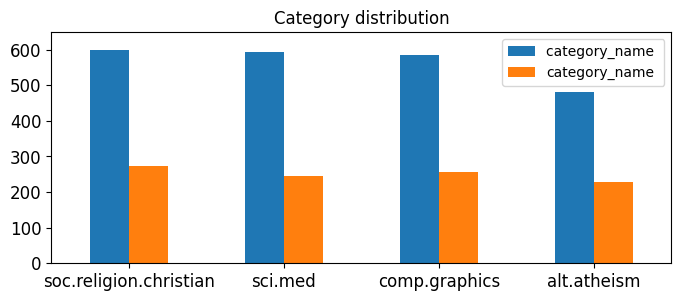

In [121]:
# Answer
upper_bound = max(X.category_name.value_counts() + 50) #276 + 50

a = X.category_name.value_counts().to_frame()
b = X_sample.category_name.value_counts().to_frame()
c = a.join(b, lsuffix=' ')
c.plot.bar(rot=0,
            title = 'Category distribution',
            ylim = [0, upper_bound], 
            fontsize = 12,
            width=0.5,
            figsize = (8,3)
)



In [149]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()[0]


'00'

In [189]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [231]:
#Answer
# the second item in fifth row
ind = sorted(X_counts[0:5, 0:100][4].indices)[1]
count_vect.get_feature_names_out()[ind]


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [244]:
# Answer here
import seaborn as sns
import matplotlib.pyplot as plt
# Pack them into a function
print(list(X.index)[[1:10]])
def draw_term_document_matrix(X_counts, rows, cols):
    # first twenty features only
    plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[cols]]
    # obtain document index
    plot_y = ["doc_"+ str(i) for i in list(X.index)[rows]]
    plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(df_todraw,
                    cmap="PuRd",
                    vmin=0, vmax=1, annot=True)

draw_term_document_matrix(X_counts, range(20,40), range(20,40))

SyntaxError: invalid syntax (3721508800.py, line 5)